# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

from sklearn import metrics
from scipy.stats import ks_2samp


In [57]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


### 1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:

- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [59]:
def reglog(data = '', resp = '', expli = '' ):
    import pandas as pd
    df = data
    tab = pd.crosstab(df[expli], df[resp], margins= True)
    tab['chance'] = tab[1]/tab[0]
    tab['RC_vs_all'] = tab['chance']/tab.loc['All','chance']
    tab['logito'] = np.log(tab['chance'])
    tab['log_rc'] = np.log(tab['RC_vs_all'])
    
    return tab

In [60]:
reglog(data = df, resp = 'flag_doente', expli = 'sex')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
sex,,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [61]:
reglog(data = df, resp='flag_doente', expli = 'cp')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
cp,,,,,,,
1.0,16,7,23,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [62]:
reglog(data = df, resp='flag_doente', expli = 'fbs')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
fbs,,,,,,,
0.0,141,117,258,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.956522,1.128558,-0.044452,0.120941
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [63]:
reglog(data = df, resp='flag_doente', expli = 'thal')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
thal,,,,,,,
3.0,129,37,166,0.286822,0.338408,-1.248894,-1.083502
6.0,6,12,18,2.000000,2.359712,0.693147,0.858540
7.0,28,89,117,3.178571,3.750257,1.156432,1.321824
?,1,1,2,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [64]:
reglog(data = df, resp='flag_doente', expli = 'exang')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
exang,,,,,,,
0.0,141,63,204,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


### 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
 - Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [65]:
def reglog_cat(data = '', resp = '', expli = '', cat = 5 ):
    import pandas as pd
    df = data
    df['qcut_'+ expli] = pd.qcut(df[expli], cat)
    tab = pd.crosstab(df['qcut_'+ expli], df[resp], margins= True)
    tab['chance'] = tab[1]/tab[0]
    tab['RC_vs_all'] = tab['chance']/tab.loc['All','chance']
    tab['logito'] = np.log(tab['chance'])
    tab['log_rc'] = np.log(tab['RC_vs_all'])
    
    return tab

In [66]:
reglog_cat(data=df, resp='flag_doente', expli = 'age')

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
qcut_age,,,,,,,
"(28.999, 45.0]",47,16,63,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [67]:
reglog_cat(data=df, resp='flag_doente', expli = 'trestbps', cat = 7)

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
qcut_trestbps,,,,,,,
"(93.999, 112.0]",29,19,48,0.655172,0.773009,-0.422857,-0.257464
"(112.0, 120.0]",31,18,49,0.580645,0.685078,-0.543615,-0.378223
"(120.0, 128.0]",16,21,37,1.312500,1.548561,0.271934,0.437326
"(128.0, 132.0]",27,18,45,0.666667,0.786571,-0.405465,-0.240073
"(132.0, 140.0]",34,24,58,0.705882,0.832840,-0.348307,-0.182914
"(140.0, 150.0]",14,17,31,1.214286,1.432682,0.194156,0.359549
"(150.0, 200.0]",13,22,35,1.692308,1.996680,0.526093,0.691486
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [68]:
reglog_cat(data=df, resp='flag_doente', expli = 'thalach', cat = 8)

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
qcut_thalach,,,,,,,
"(70.999, 121.75]",8,30,38,3.750000,4.424460,1.321756,1.487148
"(121.75, 133.5]",12,26,38,2.166667,2.556355,0.773190,0.938582
"(133.5, 144.25]",14,24,38,1.714286,2.022610,0.538997,0.704389
"(144.25, 153.0]",23,17,40,0.739130,0.872068,-0.302281,-0.136888
"(153.0, 160.0]",23,16,39,0.695652,0.820769,-0.362905,-0.197513
"(160.0, 166.0]",24,12,36,0.500000,0.589928,-0.693147,-0.527755
"(166.0, 174.0]",30,10,40,0.333333,0.393285,-1.098612,-0.933220
"(174.0, 202.0]",30,4,34,0.133333,0.157314,-2.014903,-1.849511
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


### 3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [69]:
reglog = smf.logit("flag_doente ~ C(sex) + C(cp, Treatment(4)) + trestbps + age", data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  0.3097
Time:                        17:38:13   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.8619      1.413     -4.147      0.000      -8.632      -3.092
C(sex)[T.1.0]                  1.8094      0.353      5.130      0.000       1.118       2.501
C(cp, Treatment(4))[T.1.0]    -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(4))[T.2.0]    -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(4))[T.3.0]    -2.4074      0.360     -6.690      0.000      -3.113      -1.702
trestbps                       0.0193      0.009      2.261      0.024       0.003       0.036
age                            0.0567      0.018      3.120      0.002       0.021       0.092
==============================================================================================
"""

- O sexo masculino [T1] mostra que para cada mulher doente existem 1.8 homens a mais.
- O cp com tratamento [4] aponta que este valor é representativo para pessoas com doenças cardiacas, em contrapartida aos outros tratamentos.
- Para cada 0,05 aumento na idade a pessoa pode apresentar doenças cardiacas. 
- Para cada 0,0193 de aumento na pressão arterial em repouso a pessoa pode apresentar doenças cardicas.

### 4. Avalie o seu modelo quanto a **calibragem**:

- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [70]:
df['predito'] = reglog.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,qcut_age,qcut_trestbps,qcut_thalach,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(62.0, 77.0]","(140.0, 150.0]","(144.25, 153.0]",0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(62.0, 77.0]","(150.0, 200.0]","(70.999, 121.75]",0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(62.0, 77.0]","(112.0, 120.0]","(121.75, 133.5]",0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(174.0, 202.0]",0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(166.0, 174.0]",0.027278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(28.999, 45.0]","(93.999, 112.0]","(121.75, 133.5]",0.134492
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(62.0, 77.0]","(140.0, 150.0]","(133.5, 144.25]",0.929259
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(53.0, 58.0]","(128.0, 132.0]","(70.999, 121.75]",0.843216
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(53.0, 58.0]","(128.0, 132.0]","(166.0, 174.0]",0.064913


In [71]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred

0       (0.287, 0.586]
1       (0.822, 0.944]
2       (0.822, 0.944]
3      (0.0131, 0.143]
4      (0.0131, 0.143]
            ...       
298    (0.0131, 0.143]
299     (0.822, 0.944]
300     (0.822, 0.944]
301    (0.0131, 0.143]
302     (0.143, 0.287]
Name: predito, Length: 303, dtype: category
Categories (5, interval[float64, right]): [(0.0131, 0.143] < (0.143, 0.287] < (0.287, 0.586] < (0.586, 0.822] < (0.822, 0.944]]

In [72]:
group_reg = df.groupby(cat_pred)
qualid = pd.DataFrame()
qualid['predito'] = group_reg['predito'].mean()
qualid 

,predito
predito,
"(0.0131, 0.143]",0.072008
"(0.143, 0.287]",0.209626
"(0.287, 0.586]",0.435175
"(0.586, 0.822]",0.708861
"(0.822, 0.944]",0.874819


In [73]:
qualid['pct_predito'] = group_reg['flag_doente'].mean()
qualid

,predito,pct_predito
predito,,
"(0.0131, 0.143]",0.072008,0.080645
"(0.143, 0.287]",0.209626,0.152542
"(0.287, 0.586]",0.435175,0.483871
"(0.586, 0.822]",0.708861,0.762712
"(0.822, 0.944]",0.874819,0.819672


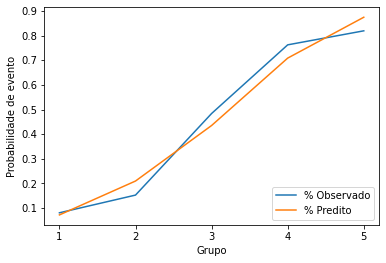

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_predito'].plot(label='% Observado')
ax = qualid['predito'].plot(label='% Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo');


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [75]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print(f'Acurácia: {round(acc*100,2)}%')

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

#Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print(f'KS: {round(ks*100,2)}% \nGINI: {round(gini*100,2)}%')


Acurácia: 79.54%
KS: 59.3% 
GINI: 70.39%


### 6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [76]:
df['flag_cp'] = (df['cp']==4).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,qcut_age,qcut_trestbps,qcut_thalach,predito,flag_cp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(62.0, 77.0]","(140.0, 150.0]","(144.25, 153.0]",0.458229,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(62.0, 77.0]","(150.0, 200.0]","(70.999, 121.75]",0.944123,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(62.0, 77.0]","(112.0, 120.0]","(121.75, 133.5]",0.886566,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(174.0, 202.0]",0.134929,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(166.0, 174.0]",0.027278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(28.999, 45.0]","(93.999, 112.0]","(121.75, 133.5]",0.134492,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(62.0, 77.0]","(140.0, 150.0]","(133.5, 144.25]",0.929259,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(53.0, 58.0]","(128.0, 132.0]","(70.999, 121.75]",0.843216,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(53.0, 58.0]","(128.0, 132.0]","(166.0, 174.0]",0.064913,0


In [88]:
reglog = smf.logit("flag_doente ~ C(sex) + C(flag_cp) + trestbps + thalach", data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.449977
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  0.3476
Time:                        17:46:07   Log-Likelihood:                -136.34
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.073e-30
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5405      1.597     -0.338      0.735      -3.670       2.589
C(sex)[T.1.0]       1.7630      0.355      4.962      0.000       1.067       2.459
C(flag_cp)[T.1]     2.1548      0.313      6.884      0.000       1.541       2.768
trestbps            0.0282      0.009      3.257      0.001       0.011       0.045
thalach            -0.0377      0.008     -4.826      0.000      -0.053      -0.022
===================================================================================
"""

In [89]:
df['predito_2'] = reglog.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flag_doente,qcut_age,qcut_trestbps,qcut_thalach,predito,flag_cp,predito_2
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,0.0,6.0,0,0,"(62.0, 77.0]","(140.0, 150.0]","(144.25, 153.0]",0.458229,0,0.414890
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,3.0,3.0,2,1,"(62.0, 77.0]","(150.0, 200.0]","(70.999, 121.75]",0.944123,1,0.978503
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,2.0,7.0,1,1,"(62.0, 77.0]","(112.0, 120.0]","(121.75, 133.5]",0.886566,1,0.869633
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(174.0, 202.0]",0.134929,0,0.103187
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,0.0,3.0,0,0,"(28.999, 45.0]","(128.0, 132.0]","(166.0, 174.0]",0.027278,0,0.033582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,0.0,7.0,1,1,"(28.999, 45.0]","(93.999, 112.0]","(121.75, 133.5]",0.134492,0,0.342459
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,2.0,7.0,2,1,"(62.0, 77.0]","(140.0, 150.0]","(133.5, 144.25]",0.929259,1,0.893046
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,1.0,7.0,3,1,"(53.0, 58.0]","(128.0, 132.0]","(70.999, 121.75]",0.843216,1,0.937485
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,1.0,3.0,1,1,"(53.0, 58.0]","(128.0, 132.0]","(166.0, 174.0]",0.064913,0,0.031218


In [90]:
cat_pred2 = pd.qcut(df['predito_2'], 5, duplicates='drop')
cat_pred2

0                      (0.281, 0.56]
1                      (0.819, 0.99]
2                      (0.819, 0.99]
3      (0.008570000000000001, 0.129]
4      (0.008570000000000001, 0.129]
                   ...              
298                    (0.281, 0.56]
299                    (0.819, 0.99]
300                    (0.819, 0.99]
301    (0.008570000000000001, 0.129]
302                   (0.129, 0.281]
Name: predito_2, Length: 303, dtype: category
Categories (5, interval[float64, right]): [(0.008570000000000001, 0.129] < (0.129, 0.281] < (0.281, 0.56] < (0.56, 0.819] < (0.819, 0.99]]

In [91]:
group_reg2 = df.groupby(cat_pred2)
qualid2 = pd.DataFrame()
qualid2['predito'] = group_reg2['predito_2'].mean()
qualid2

,predito
predito_2,
"(0.008570000000000001, 0.129]",0.063191
"(0.129, 0.281]",0.195722
"(0.281, 0.56]",0.415057
"(0.56, 0.819]",0.706411
"(0.819, 0.99]",0.913097


In [92]:
qualid2['pct_predito'] = group_reg2['flag_doente'].mean()
qualid2

,predito,pct_predito
predito_2,,
"(0.008570000000000001, 0.129]",0.063191,0.065574
"(0.129, 0.281]",0.195722,0.150000
"(0.281, 0.56]",0.415057,0.475410
"(0.56, 0.819]",0.706411,0.683333
"(0.819, 0.99]",0.913097,0.918033


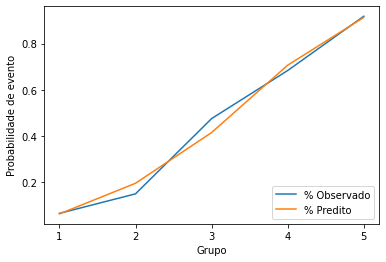

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid2['pct_predito'].plot(label='% Observado')
ax = qualid2['predito'].plot(label='% Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo');


In [94]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito_2']>.5)
print(f'Acurácia: {round(acc*100,2)}%')

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_2'])
auc_ = metrics.auc(fpr, tpr)

#Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_2'], df.loc[df['flag_doente'] != 1, 'predito_2']).statistic

print(f'KS: {round(ks*100,2)}% \nGINI: {round(gini*100,2)}%')

Acurácia: 78.22%
KS: 60.55% 
GINI: 74.25%
